<a href="https://colab.research.google.com/github/lauramsromano/one_page_report/blob/main/one_page_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📁 [Script de categorização dos comentários](https://colab.research.google.com/drive/1uZlB8M8-VWWDAS5iTyG6MhBKN4yTj6G5#scrollTo=Gj-g1RjiKP5Y)

One Page Report 📊

O termo One Page Report está ganhando popularidade no mundo corporativo, especialmente na gestão de projetos.

Trata-se de relatórios concisos de uma página, fornecendo uma visão geral e precisa dos dados para tomadas rápidas de decisão.

Esses relatórios atuam como mapas estratégicos, utilizando gráficos e dados para facilitar a análise crítica e síntese.

Neste projeto buscamos elaborar um script que constroi report para diferentes meses e diferentes unidades de um negócio, a fim de sintetizar e facilitar o acesso das informações para os colaboradores.

---

Foram utilizados dados randômicos para simular dois tipos de report:

- análise mensal de indicadores de satisfação de uma empresa de refeição coletiva;
- análise anual de uma consultoria de T.I.

In [ ]:
# bibliotecas utilizadas
from google.colab import drive # conexão google drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt # gráficos e objetos
from matplotlib import gridspec # layout de grade
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch # caixa com dimensões especificadas
import matplotlib.image as mpimg # gerar imagem
from matplotlib.backends.backend_pdf import PdfPages # gerar e salvar pdf

from mpl_toolkits.axes_grid1.inset_locator import inset_axes # eixos

import pandas as pd # análise de dados
import numpy as np # análise de dados
import random # dados randômicos
from wordcloud import WordCloud # wordcloud
from datetime import datetime, timedelta # config data

import nltk # tratamento de stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 🍲 Indicadores de uma empresa de refeição coletiva:

🔢`dados randômicos`



In [ ]:
random.seed(42)
unidades = ['Unidade A', 'Unidade B', 'Unidade C', 'Unidade D', 'Unidade E']
turnos = ['Café da Manhã', 'Almoço', 'Jantar']
microfeedbacks = ['Sabor', 'Temperatura', 'Cardápio', 'Variedades']
estrelas = ['1 estrela', '2 estrelas', '3 estrelas', '4 estrelas', '5 estrelas']
comentarios = [
    "A comida foi incrível! Altamente recomendado.",
    "O serviço foi rápido e eficiente. Adorei a experiência.",
    "Infelizmente, a comida estava fria.",
    "O restaurante estava lotado e o serviço foi muito lento.",
    "Excelente atendimento ao cliente, mas a comida deixou a desejar.",
    "O ambiente do restaurante é muito agradável, mas os preços são altos.",
    "Não recomendo. A comida estava sem sabor e o atendimento foi ruim.",
    "Tive uma ótima experiência. A equipe foi amigável e a comida deliciosa.",
    "A espera para conseguir uma mesa foi longa, mas a comida compensou.",
    "Comida deliciosa, mas o serviço deixou a desejar desta vez."
]

datas = [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365)) for _ in range(365)]

df = pd.DataFrame({
    'unidade': np.random.choice(unidades, 365),
    'turno': np.random.choice(turnos, 365),
    'satisfacao': np.random.uniform(3, 5, 365),
    'data': datas,
    #'estrelas': np.random.choice(range(1, 5), 365),
    'estrelas': np.random.choice(estrelas, 365),
    'microfeedbacks': np.random.choice(microfeedbacks, 365),
    'comentarios': np.random.choice(comentarios, 365),
})

df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df['dia'] = df['data'].dt.day

df['dia_semana'] = df['data'].dt.day_name()

dias_semana_pt = {
    'Monday': 'segunda',
    'Tuesday': 'terça',
    'Wednesday': 'quarta',
    'Thursday': 'quinta',
    'Friday': 'sexta',
    'Saturday': 'sábado',
    'Sunday': 'domingo'
}

dict_mes = {1:'Janeiro',
            2:'Fevereiro',
            3:'Março',
            4:'Abril',
            5:'Maio',
            6:'Junho',
            7:'Julho',
            8:'Agosto',
            9:'Setembro',
            10:'Outubro',
            11:'Novembro',
            12:'Dezembro'}


df['dia_semana'] = df['data'].apply(lambda x: dias_semana_pt[x.strftime('%A')])
df['mes_text'] = df['mes'].map(dict_mes)
df

,unidade,turno,satisfacao,data,estrelas,microfeedbacks,comentarios,ano,mes,dia,dia_semana,mes_text
0,Unidade E,Café da Manhã,4.435114,2023-11-24,5 estrelas,Cardápio,"O ambiente do restaurante é muito agradável, m...",2023,11,24,sexta,Novembro
1,Unidade C,Almoço,4.263733,2023-02-27,1 estrela,Temperatura,"Excelente atendimento ao cliente, mas a comida...",2023,2,27,segunda,Fevereiro
2,Unidade D,Jantar,4.039014,2023-01-13,3 estrelas,Temperatura,"Comida deliciosa, mas o serviço deixou a desej...",2023,1,13,sexta,Janeiro
3,Unidade C,Almoço,3.923537,2023-05-21,1 estrela,Sabor,O serviço foi rápido e eficiente. Adorei a exp...,2023,5,21,domingo,Maio
4,Unidade B,Café da Manhã,4.341008,2023-05-06,1 estrela,Cardápio,Tive uma ótima experiência. A equipe foi amigá...,2023,5,6,sábado,Maio
...,...,...,...,...,...,...,...,...,...,...,...,...
360,Unidade B,Almoço,4.428340,2023-12-10,1 estrela,Variedades,Tive uma ótima experiência. A equipe foi amigá...,2023,12,10,domingo,Dezembro
361,Unidade B,Jantar,4.189557,2023-11-27,3 estrelas,Sabor,Tive uma ótima experiência. A equipe foi amigá...,2023,11,27,segunda,Novembro
362,Unidade D,Almoço,3.285532,2023-06-03,4 estrelas,Sabor,Não recomendo. A comida estava sem sabor e o a...,2023,6,3,sábado,Junho
363,Unidade E,Café da Manhã,3.157082,2023-08-23,5 estrelas,Variedades,"O ambiente do restaurante é muito agradável, m...",2023,8,23,quarta,Agosto


📑 `script`

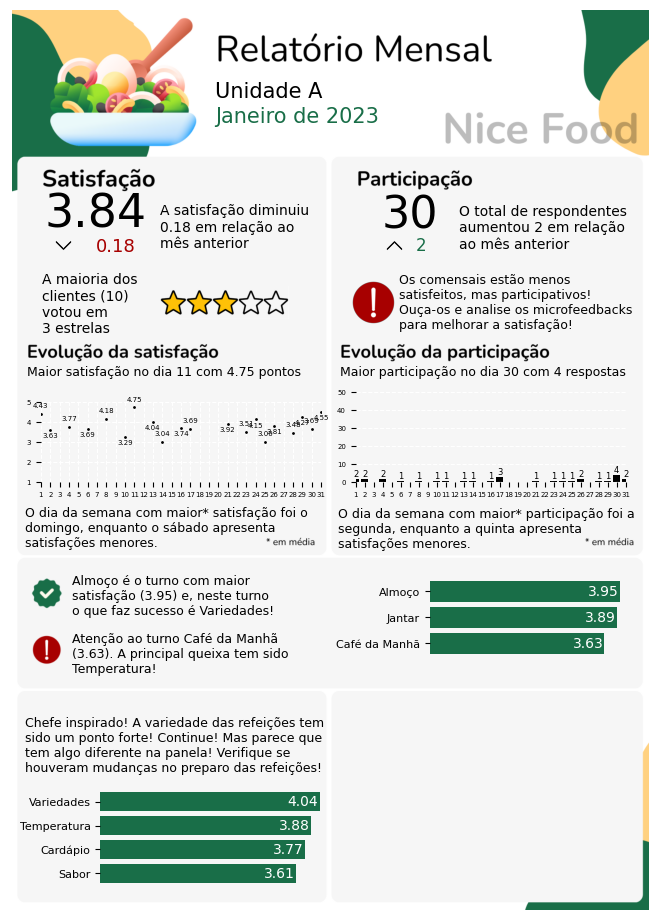

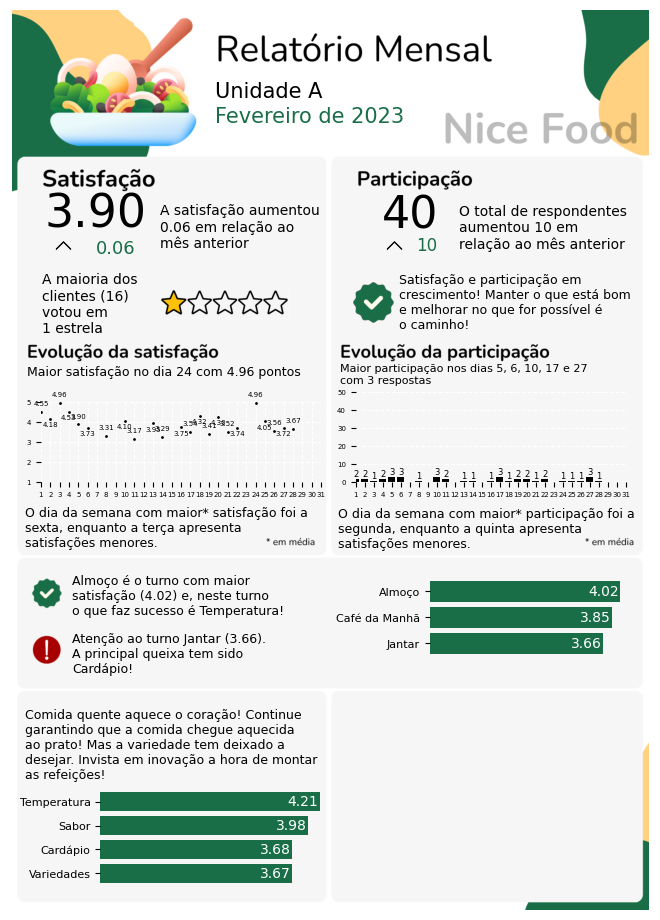

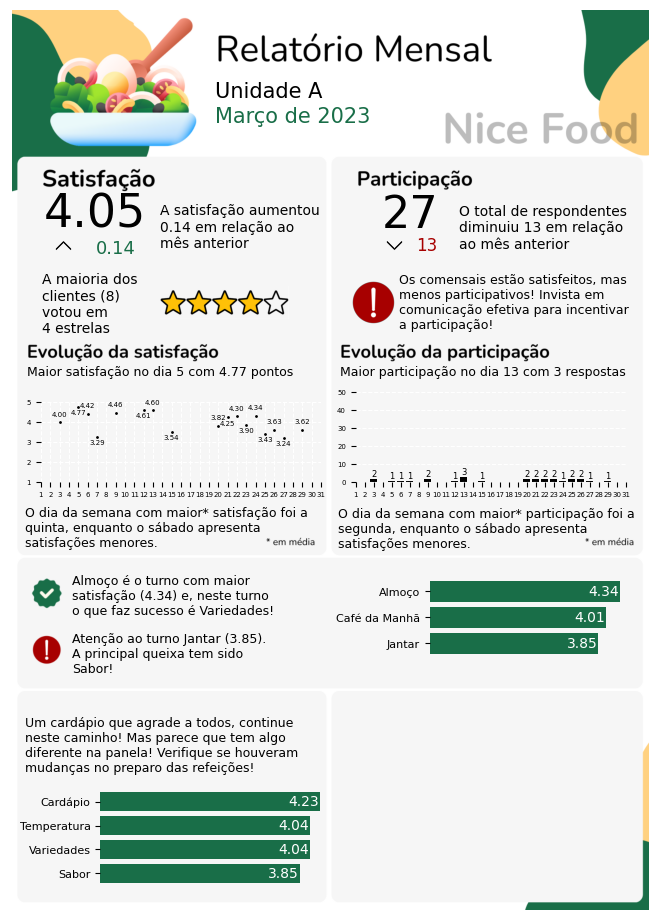

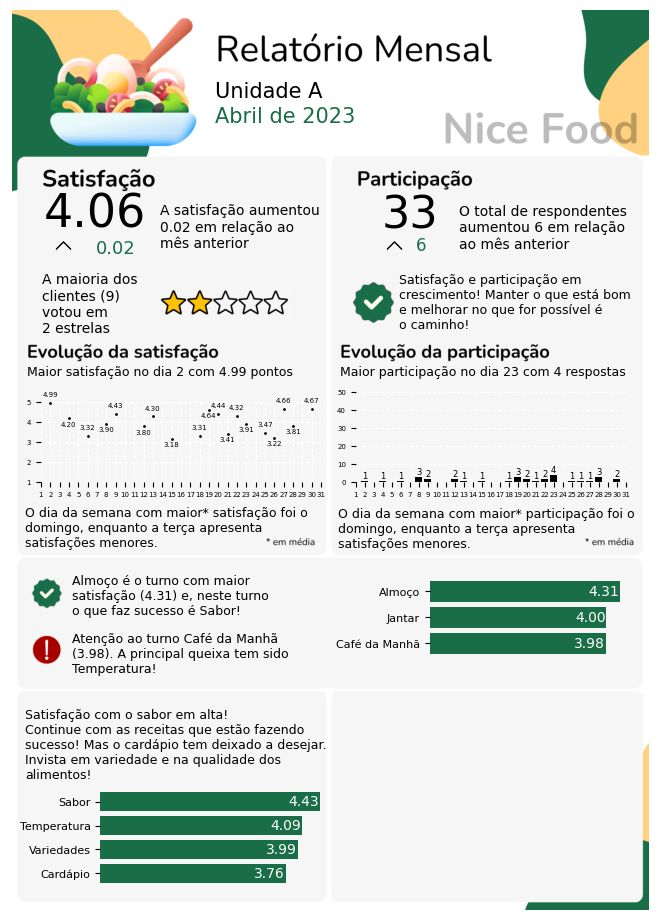

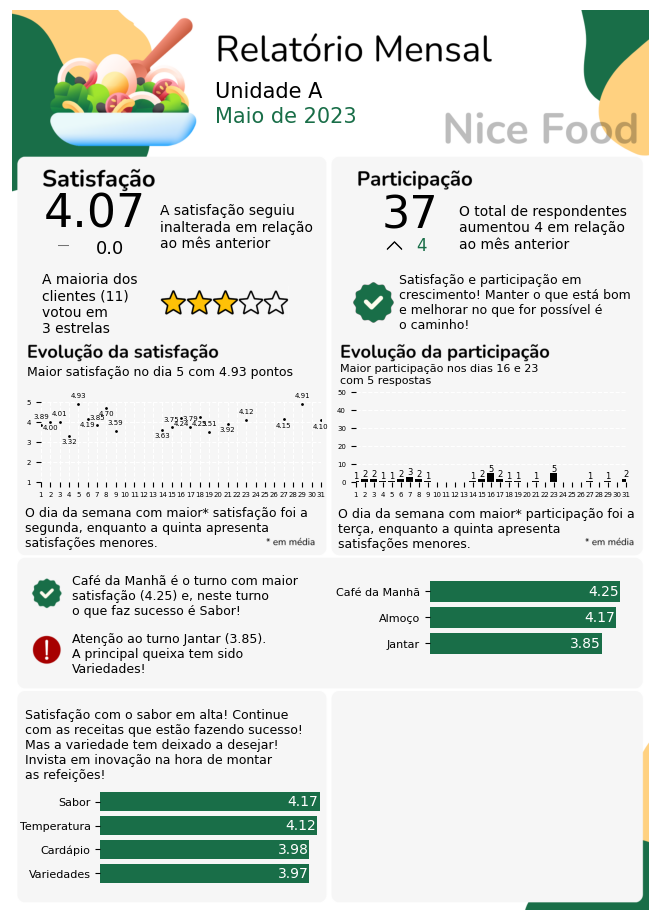

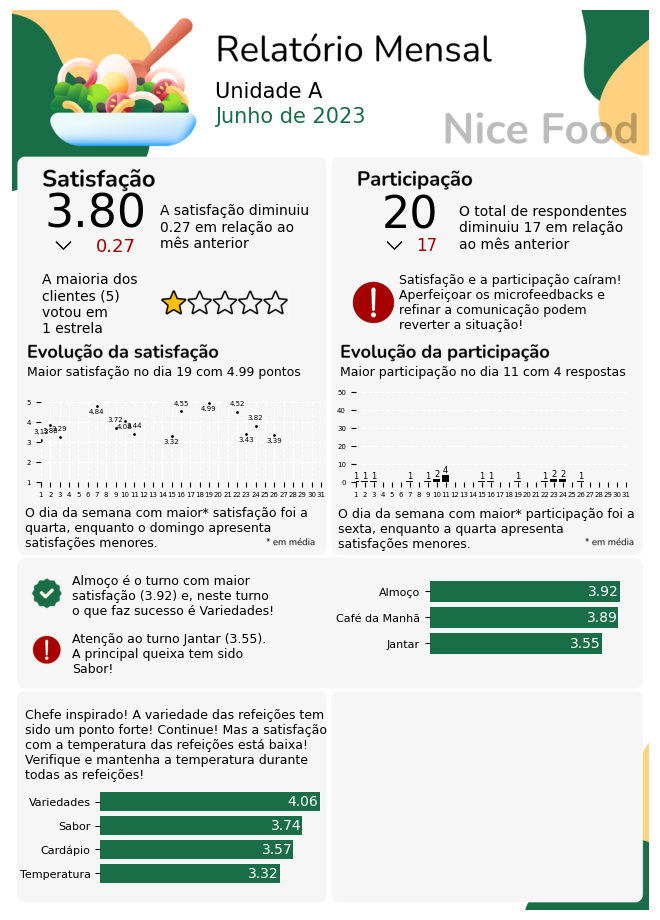

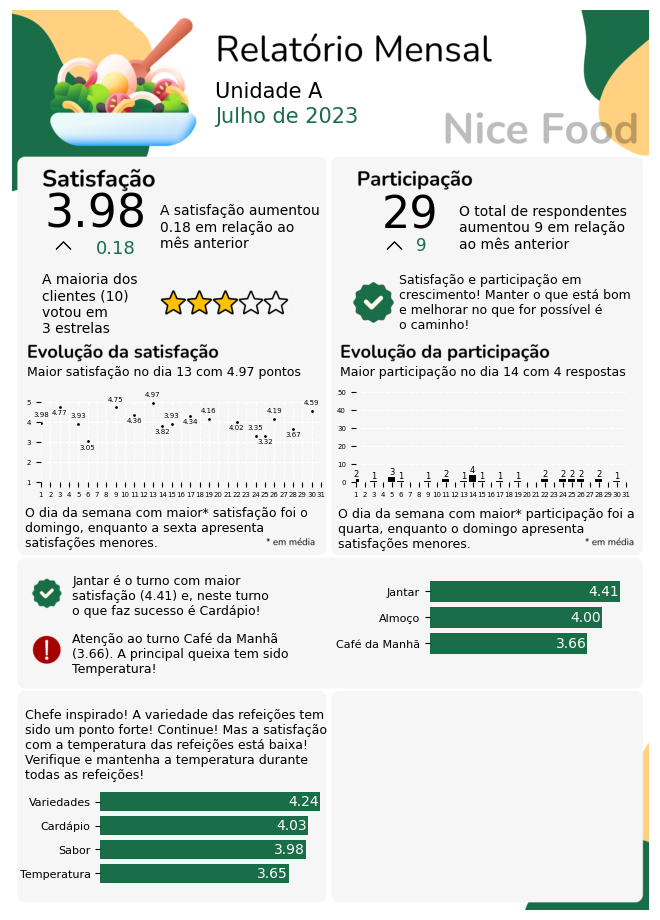

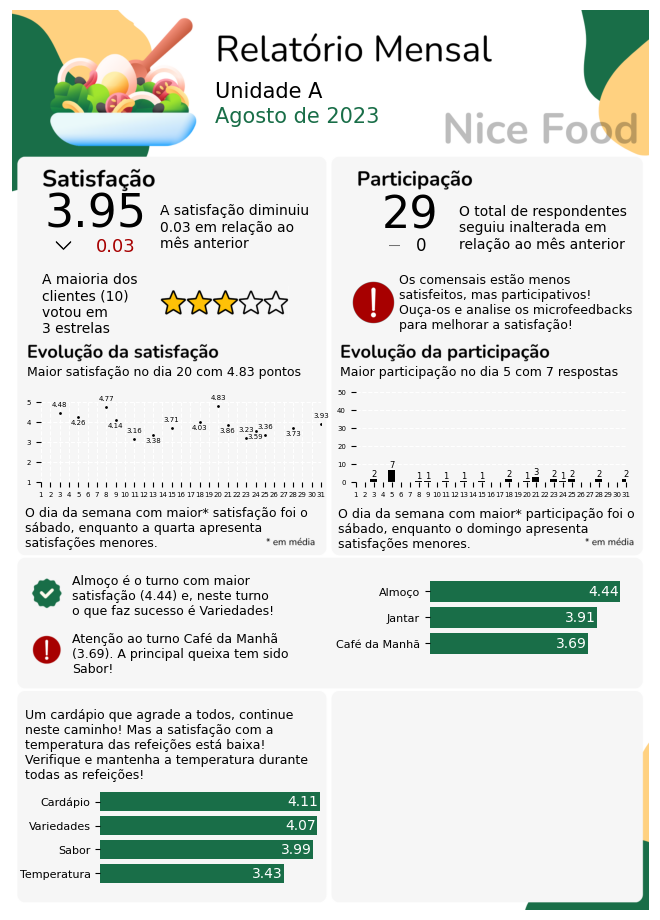

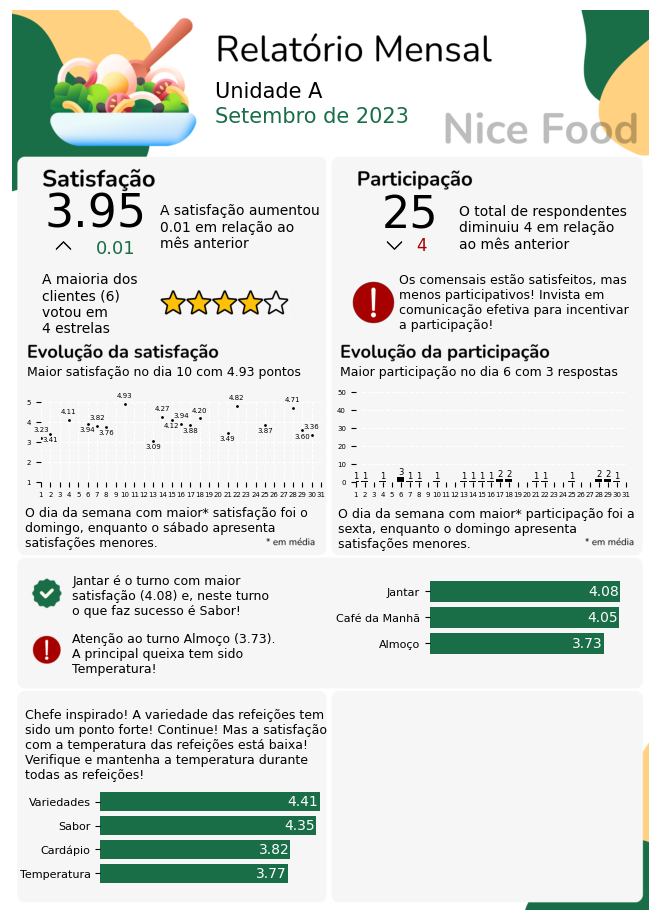

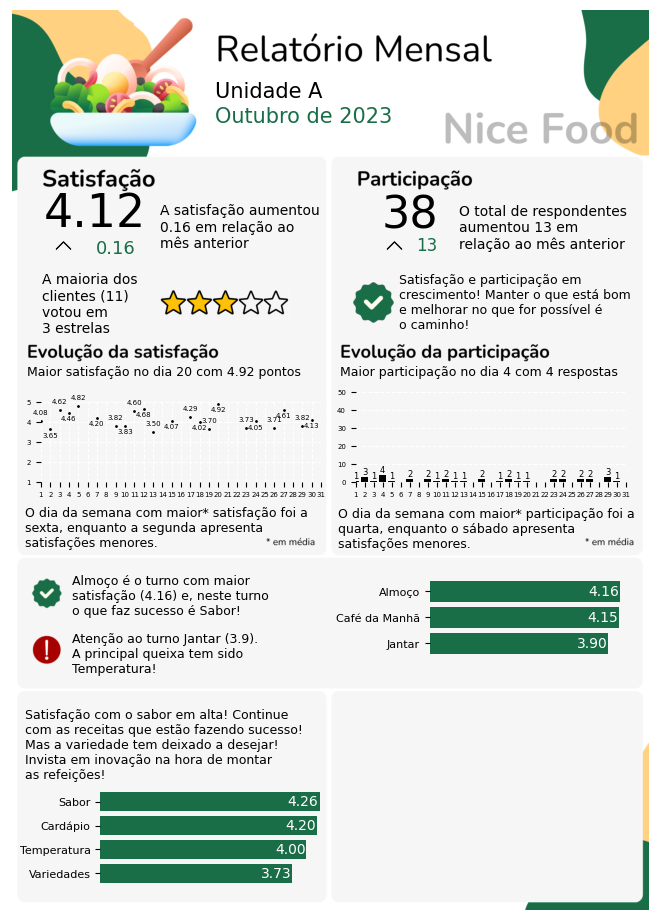

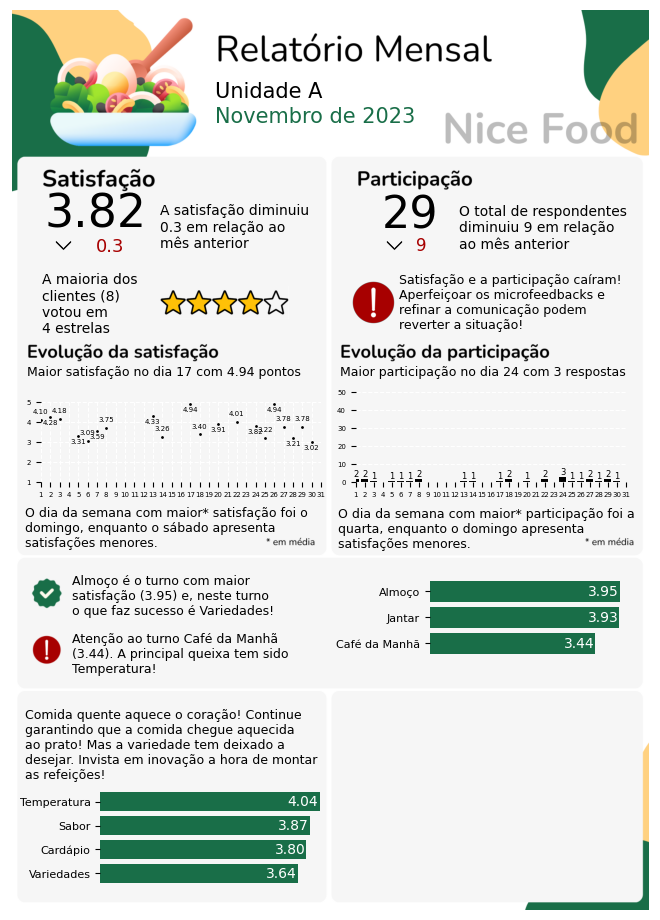

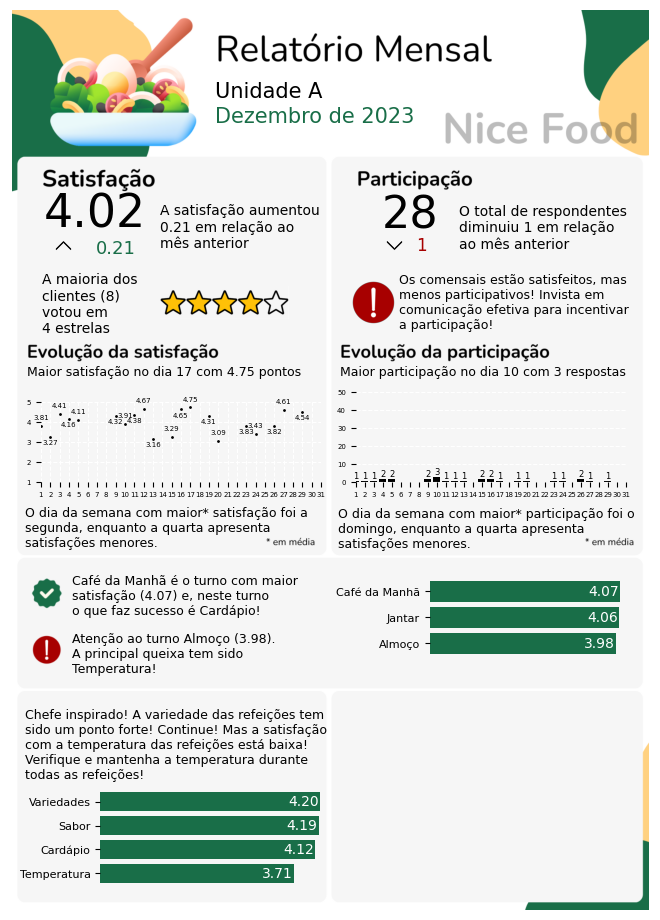

In [ ]:
ordem_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
meses = sorted(df['mes_text'].unique(), key=lambda x: ordem_meses.index(x))

for i, mes in enumerate(meses): # 'for' para percorrer todos os meses
    mes_atual = mes
    index_mes_anterior = (i - 1) % len(ordem_meses)
    mes_anterior = ordem_meses[index_mes_anterior]

    # FUNDO:
    capa = plt.figure(figsize=(8.27, 11.69))  # Tamanho A4
    gscapa = capa.add_gridspec(40, 30, wspace=0, hspace=0)

    axcapa = capa.add_subplot(gscapa[:, :])
    [spine.set_color('none') for spine in axcapa.spines.values()]
    [tick.label1.set_visible(False) for tick in axcapa.xaxis.get_major_ticks()]
    [tick.label1.set_visible(False) for tick in axcapa.yaxis.get_major_ticks()]
    axcapa.tick_params(axis='both', color='none')

    caminho_da_imagem_capa = '/content/drive/MyDrive/Estudos/report/img/mockup3.png'
    imagem = mpimg.imread(caminho_da_imagem_capa)
    img = axcapa.imshow(imagem)
    axcapa.axis('off')

    ## LAYOUTS:
    # unidade e data:
    layout_bg_header_unidade = capa.add_subplot(gscapa[2:4, :30])
    layout_bg_header_mes_ano = capa.add_subplot(gscapa[4:6, :30])
    # satisfação:
    layout_satisfaction_sat = capa.add_subplot(gscapa[8:11, 1:7])
    layout_satisfaction_sat_var_img = capa.add_subplot(gscapa[10:11, 0:5])
    layout_satisfaction_sat_var_valor = capa.add_subplot(gscapa[9:11, 4:6])
    layout_satisfaction_sat_var_resumo = capa.add_subplot(gscapa[8:11, 7:15])
    # estrelas:
    layout_estrela_text = capa.add_subplot(gscapa[11:14, 2:7])
    layout_estrela_img = capa.add_subplot(gscapa[11:15, 7:13])
    # gráf evolução satisfação:
    layout_ev_sat_text = capa.add_subplot(gscapa[16:17, 2:15])
    layout_ev_sat_graf = capa.add_subplot(gscapa[16:21, 2:14])
    layout_ev_sat_resumo = capa.add_subplot(gscapa[21:23, 2:15])
    # turno:
    layout_turno_graf =  capa.add_subplot(gscapa[23:31, 17:29])
    layout_turno_resumo_max = capa.add_subplot(gscapa[25:27, 2:15])
    layout_turno_resumo_min = capa.add_subplot(gscapa[28:30, 2:15])
    # microfeedbacks:
    layout_microfeedbacks_graf = capa.add_subplot(gscapa[32:39, 2:15])
    layout_microf_resumo =  capa.add_subplot(gscapa[30:33, 2:15])
    # respostas:
    layout_responses_resp =  capa.add_subplot(gscapa[8:11, 16:21])
    layout_responses_resp_var_img = capa.add_subplot(gscapa[10:11, 17:19])
    layout_responses_resp_var_valor = capa.add_subplot(gscapa[9:11, 19:20])
    layout_responses_resp_var_resumo =  capa.add_subplot(gscapa[8:10, 21:28])
    # respostas insight:
    layout_responses_ins = capa.add_subplot(gscapa[12:14, 16:18])
    layout_responses_ins_resumo = capa.add_subplot(gscapa[12:14, 19:28])
    # gráf evolução participação:
    layout_ev_responses_graf  = capa.add_subplot(gscapa[16:22, 16:29])
    layout_ev_responses_titulo = capa.add_subplot(gscapa[16:17, 16:29])
    layout_ev_part_resumo = capa.add_subplot(gscapa[22:24, 16:29])


    ## MÊS E UNIDADE:
    mes = mes
    ano = 2023
    layout_bg_header_mes_ano.text(0.32, 0.4, f'{mes} de {ano}', ha='left', va='bottom', fontsize=15, color='#196e48')

    unidade = 'Unidade A' # aqui é importante automatizar para percorrer por todas as unidades possíveis
    layout_bg_header_unidade.text(0.32, 0.4, f'{unidade}', ha='left', va='top', fontsize=15, color='black')

    ## SATISFAÇÃO:
    sat_atual_text = '{:.2f}'.format(df[df['mes_text'] == mes_atual]['satisfacao'].mean()) # satisfação do mês (formatado)
    sat_atual = df[df['mes_text'] == mes_atual]['satisfacao'].mean()  # satisfação do mês
    sat_ant = df[df['mes_text'] == mes_anterior]['satisfacao'].mean() # satisfação do mês anterior
    sat_var = round(sat_atual - sat_ant, 2) # variação da satisfação

    # satisfação
    layout_satisfaction_sat.text(0.1, 0.3, f'{sat_atual_text}', ha='left', va='bottom', fontsize=33, color='black')

    # satisfação texto
    if sat_var > 0:
      layout_satisfaction_sat_var_resumo.text(0, 0.1, f'A satisfação aumentou \n{sat_var} em relação ao \nmês anterior', ha='left', va='bottom', fontsize=10, color='black')
    elif sat_var < 0:
      layout_satisfaction_sat_var_resumo.text(0, 0.1, f'A satisfação diminuiu \n{abs(sat_var)} em relação ao \nmês anterior', ha='left', va='bottom', fontsize=10, color='black')
    else:
      layout_satisfaction_sat_var_resumo.text(0, 0.1, f'A satisfação seguiu \ninalterada em relação \nao mês anterior', ha='left', va='bottom', fontsize=10, color='black')

    # var satisfação valor e img
    caminho_da_imagem_up = '/content/drive/MyDrive/Estudos/report/img/up-arrow.png'
    caminho_da_imagem_down = '/content/drive/MyDrive/Estudos/report/img/down-arrow.png'
    caminho_da_imagem_line = '/content/drive/MyDrive/Estudos/report/img/minus.png'

    if sat_var > 0:
      layout_satisfaction_sat_var_valor.text(0, 0.2, abs(sat_var), ha='left', va='center', fontsize=13, color='#196e48')
      imagem = mpimg.imread(caminho_da_imagem_up)
    elif sat_var < 0:
      layout_satisfaction_sat_var_valor.text(0, 0.24, abs(sat_var), ha='left', va='center', fontsize=13, color='#a70000')
      imagem = mpimg.imread(caminho_da_imagem_down)
    else:
      layout_satisfaction_sat_var_valor.text(0, 0.2, abs(sat_var), ha='left', va='center', fontsize=13, color='black')
      imagem = mpimg.imread(caminho_da_imagem_line)

    img = layout_satisfaction_sat_var_img.imshow(imagem)
    nova_largura = imagem.shape[1]
    nova_altura = imagem.shape[0]
    img.set_extent([0, nova_largura, 0, nova_altura])
    layout_satisfaction_sat_var_img.axis('off')

    ## ESTRELAS:
    abs_estrelas = df[df['mes_text'] == mes_atual]['estrelas'].value_counts().reset_index().rename(columns={'index': 'estrelas', 'count': 'contagem'}) # qtde de votos por estrelas no mês
    abs_estrelas = abs_estrelas.sort_values(by='contagem', ascending=True) # ordenando
    max_estrelas = abs_estrelas.loc[abs_estrelas['contagem'].idxmax()]['estrelas'] # estrelas com mais votos
    qtd_estrelas = abs_estrelas.loc[abs_estrelas['estrelas'] == max_estrelas]['contagem'].values[0] # atde da estrelas com mais votos

    # estrelas texto
    layout_estrela_text.text(-0.1, 0.3, f'A maioria dos \nclientes ({qtd_estrelas}) \nvotou em \n{max_estrelas}', ha='left', va='center', fontsize=10, color='black')

    # estrela img
    umaestrela = '/content/drive/MyDrive/Estudos/report/img/1estrela.png'
    duasestrelas = '/content/drive/MyDrive/Estudos/report/img/2estrelas.png'
    tresestrelas = '/content/drive/MyDrive/Estudos/report/img/3estrelas.png'
    quatroestrelas = '/content/drive/MyDrive/Estudos/report/img/4estrelas.png'
    cincoestrelas = '/content/drive/MyDrive/Estudos/report/img/5estrelas.png'

    if max_estrelas == "5 estrelas":
      imagem = mpimg.imread(cincoestrelas)
    elif max_estrelas == "4 estrelas":
      imagem = mpimg.imread(quatroestrelas)
    elif max_estrelas == "3 estrelas":
      imagem = mpimg.imread(tresestrelas)
    elif max_estrelas == "2 estrelas":
      imagem = mpimg.imread(duasestrelas)
    else:
      imagem = mpimg.imread(umaestrela)

    img = layout_estrela_img.imshow(imagem)
    nova_largura = imagem.shape[1]
    nova_altura = imagem.shape[0]
    img.set_extent([0, nova_largura, 0, nova_altura])
    layout_estrela_img.axis('off')

    ## GRÁF EVOLUÇÃO SATISFAÇÃO
    media_satisfacao_por_dia = df[df['mes_text'] == mes_atual].groupby('dia')['satisfacao'].mean().reset_index() # df média da satisfação por dia no mês atual
    max_sat = round(max(media_satisfacao_por_dia['satisfacao']),2) # maior satisfação no mês
    day_max_sat = round(media_satisfacao_por_dia.loc[media_satisfacao_por_dia['satisfacao'].idxmax()]['dia']) # dia com maior satisfação no mês
    dias_com_max_satisfacao = media_satisfacao_por_dia[media_satisfacao_por_dia['satisfacao'] == max_sat]['dia'] # dias com maior satisfação no mês (caso mais de um dia)

    # subtitulo gráf ev satisfação
    if len(dias_com_max_satisfacao) > 1:
      formatted_dias = ', '.join(map(str, dias_com_max_satisfacao.iloc[:-1])) + ' e ' + str(dias_com_max_satisfacao.iloc[-1])
      layout_ev_sat_text.text(-0.094, 0.3, f'Maior satisfação nos dias {formatted_dias} \ncom {max_sat} pontos', ha='left', va='bottom', fontsize=8, color='black')
    else:
      layout_ev_sat_text.text(-0.094, 0.6, f'Maior satisfação no dia {day_max_sat} com {max_sat} pontos', ha='left', va='bottom', fontsize=9, color='black')

    # ev satisfação gráfico
    iax_width, iax_height = 2.8, 0.8
    iax = inset_axes(layout_ev_sat_graf, width=iax_width, height=iax_height, borderpad=0, loc='lower center')
    media_satisfacao_por_dia = df[df['mes_text'] == mes_atual].groupby('dia')['satisfacao'].mean().reset_index()
    iax.scatter(media_satisfacao_por_dia['dia'], media_satisfacao_por_dia['satisfacao'], s=1, color= 'black', zorder=2)
    iax.set_ylim(1, 5)
    iax.set_xlim(1, 31)
    iax.set_xticks(range(1, 32))
    iax.spines[:].set_visible(False)
    iax.tick_params(axis='both', which='both', labelsize=5)
    for i, txt in enumerate(media_satisfacao_por_dia['satisfacao']):
        offset = 0.3 if i % 2 == 0 else -0.4
        iax.text(media_satisfacao_por_dia['dia'].iloc[i], txt + offset, f'{txt:.2f}', ha='center', fontsize=5, color="black")
    iax.grid(ls='--', c='w', zorder=1)
    iax.set_facecolor('none')

    # resumo dias da semana gráf satifação
    diasemana_sat = df[df['mes_text'] == mes_atual].groupby("dia_semana")['satisfacao'].mean().reset_index() # satisfação por dia da semana
    dia_maior_sat = diasemana_sat.loc[diasemana_sat['satisfacao'].idxmax()]['dia_semana'] # dia da semana com maior satisfação
    dia_menor_sat = diasemana_sat.loc[diasemana_sat['satisfacao'].idxmin()]['dia_semana'] # dia da semana com menor satisfação

    sem_a = ["sábado", "domingo"]  ### FAZER TRATATIVA PARA CASO TENHA MAIS DE UM DIA
    art_maior = "o" if dia_maior_sat in sem_a else "a"
    art_menor = "o" if dia_menor_sat in sem_a else "a"
    message = f"O dia da semana com maior* satisfação foi {art_maior} \n{dia_maior_sat}, enquanto {art_menor} {dia_menor_sat} apresenta \nsatisfações menores."
    layout_ev_sat_resumo.text(-0.1, -0.5, message, ha='left', va='bottom', fontsize=9, color='black')

    ## TURNO:
    media_satisfacao_por_turno = df[df['mes_text'] == mes_atual].groupby('turno')['satisfacao'].mean().reset_index().sort_values(by='satisfacao', ascending=True) # satisfação por turno

    turno_max_sat = media_satisfacao_por_turno.loc[media_satisfacao_por_turno['satisfacao'].idxmax()]['turno'] # turno com maior satisfação
    sat_turno_max_sat = media_satisfacao_por_turno.loc[media_satisfacao_por_turno['satisfacao'].idxmax()]['satisfacao'].round(2) # satisfação do turno com maior satisfação

    turno_min_sat = media_satisfacao_por_turno.loc[media_satisfacao_por_turno['satisfacao'].idxmin()]['turno'] # turno com menor satisfação
    sat_turno_min_sat = media_satisfacao_por_turno.loc[media_satisfacao_por_turno['satisfacao'].idxmin()]['satisfacao'].round(2) # satisfação do turno com menor satisfação

    # turno gráfico
    bx_width, bx_height = 2, 0.8
    bx = inset_axes(layout_turno_graf, width=bx_width, height=bx_height, borderpad=0, loc='center right')
    bars = bx.barh(media_satisfacao_por_turno['turno'], media_satisfacao_por_turno['satisfacao'], color='#196e48', height=0.8)
    bx.spines[:].set_visible(False)
    bx.set_xticks([])
    bx.set_facecolor('none')
    bx.tick_params(axis='y', labelsize=8)
    for bar in bars:
        width = bar.get_width()
        height = bar.get_height()
        plt.text(width - 0.02, bar.get_y() + height / 2, f'{width:.2f}', ha='right', va='center', color='white')

    # resumo turno x microfeedback
    df_turno = df[df['mes_text'] == mes_atual].groupby(['turno', 'microfeedbacks'])['satisfacao'].mean().reset_index() # agrupamento por turno e microfeedback
    df_turno_max = df_turno[df_turno['turno'] == turno_max_sat] # df com o turno de maior satisfação

    max_microf = df_turno_max.loc[df_turno_max['satisfacao'].idxmax()]['microfeedbacks'] # microfeedback com maior satisfação
    min_microf = df_turno_max.loc[df_turno_max['satisfacao'].idxmin()]['microfeedbacks'] # microfeedback com menor satisfação

    layout_turno_resumo_max.text(0.07, 0, f'{turno_max_sat} é o turno com maior \nsatisfação ({sat_turno_max_sat}) e, neste turno \no que faz sucesso é {max_microf}!', ha='left', va='bottom', fontsize=9, color='black')
    if turno_min_sat == 'Café da Manhã':
      layout_turno_resumo_min.text(0.07, 0.2, f'Atenção ao turno {turno_min_sat} \n({sat_turno_min_sat}). A principal queixa tem sido \n{min_microf}!', ha='left', va='bottom', fontsize=9, color='black')
    else:
      layout_turno_resumo_min.text(0.07, 0.2, f'Atenção ao turno {turno_min_sat} ({sat_turno_min_sat}). \nA principal queixa tem sido \n{min_microf}!', ha='left', va='bottom', fontsize=9, color='black')

    ## MICROFEEDBACKS:
    abs_microfeedbacks = df[df['mes_text'] == mes_atual].groupby('microfeedbacks')['satisfacao'].mean().reset_index().sort_values(by='satisfacao', ascending=True) # df satisfação por microfeedback
    max_microfeedbacks = abs_microfeedbacks.loc[abs_microfeedbacks['satisfacao'].idxmax()]['microfeedbacks'] # microfeedback com maior satisfação
    min_microfeedbacks = abs_microfeedbacks.loc[abs_microfeedbacks['satisfacao'].idxmin()]['microfeedbacks'] # microfeedback com menor satisfação

    # microfeedbacks grafico
    bx_width, bx_height = 2.3, 1
    bx = inset_axes(layout_microfeedbacks_graf, width=bx_width, height=bx_height, borderpad=0, loc='lower right')
    bars = bx.barh(abs_microfeedbacks['microfeedbacks'], abs_microfeedbacks['satisfacao'], color='#196e48', height=0.8)
    bx.spines[:].set_visible(False)
    bx.set_xticks([])
    bx.set_facecolor('none')
    bx.tick_params(axis='y', labelsize=8)
    for bar in bars:
        width = bar.get_width()
        height = bar.get_height()
        plt.text(width - 0.02, bar.get_y() + height / 2, f'{width:.2f}', ha='right', va='center', color='white')

    # microfeedbakc resumo
    feedback_messages = {
        ("Temperatura", "Cardápio"): 'Comida quente aquece o coração! Continue \ngarantindo que a comida chegue aquecida \nao prato! Mas o cardápio tem deixado a \ndesejar. Invista em variedade e na qualidade \ndos alimentos!',
        ("Temperatura", "Sabor"): 'Comida quente aquece o coração! Continue \ngarantindo que a comida chegue aquecida \nao prato! Mas parece que tem algo diferente na \npanela! Verifique se houveram mudanças no \npreparo das refeições!',
        ("Temperatura", "Variedades"): 'Comida quente aquece o coração! Continue \ngarantindo que a comida chegue aquecida \nao prato! Mas a variedade tem deixado a \ndesejar. Invista em inovação a hora de montar \nas refeições!',
        ("Cardápio", "Temperatura"): 'Um cardápio que agrade a todos, continue \nneste caminho! Mas a satisfação com a \ntemperatura das refeições está baixa! \nVerifique e mantenha a temperatura durante \ntodas as refeições!',
        ("Cardápio", "Sabor"): 'Um cardápio que agrade a todos, continue \nneste caminho! Mas parece que tem algo \ndiferente na panela! Verifique se houveram \nmudanças no preparo das refeições!',
        ("Cardápio", "Variedades"): 'Um cardápio que agrade a todos, continue \nneste caminho! Mas a variedade tem deixado a \ndesejar! Invista em inovação a hora de montar \nas refeições!',
        ("Sabor", "Temperatura"): 'Satisfação com o sabor em alta! Continue \ncom as receitas que estão fazendo sucesso! \nMas a satisfação com a temperatura das \nrefeições está baixa! Verifique e mantenha a \ntemperatura durante todas as refeições!',
        ("Sabor", "Cardápio"): 'Satisfação com o sabor em alta! \nContinue com as receitas que estão fazendo \nsucesso! Mas o cardápio tem deixado a desejar. \nInvista em variedade e na qualidade dos \nalimentos!',
        ("Sabor", "Variedades"): 'Satisfação com o sabor em alta! Continue \ncom as receitas que estão fazendo sucesso! \nMas a variedade tem deixado a desejar! \nInvista em inovação na hora de montar \nas refeições!',
        ("Variedades", "Temperatura"): 'Chefe inspirado! A variedade das refeições tem \nsido um ponto forte! Continue! Mas a satisfação \ncom a temperatura das refeições está baixa! \nVerifique e mantenha a temperatura durante \ntodas as refeições!',
        ("Variedades", "Cardápio"): 'Chefe inspirado! A variedade das refeições tem \nsido um ponto forte! Continue! Mas o cardápio \ntem deixado a desejar. Invista em variedade \ne na qualidade dos alimentos!',
        ("Variedades", "Sabor"): 'Chefe inspirado! A variedade das refeições tem \nsido um ponto forte! Continue! Mas parece que \ntem algo diferente na panela! Verifique se \nhouveram mudanças no preparo das refeições!'
    }

    message = feedback_messages.get((max_microfeedbacks, min_microfeedbacks))
    if message:
        layout_microf_resumo.text(-0.1, 0.1, message, ha='left', va='center', fontsize=9, color='black')

    ## PARTICIPAÇÃO
    resp_atual = df[df['mes_text'] == mes_atual]['satisfacao'].count() # qtde de respostas no mês atual
    resp_ant = df[df['mes_text'] == mes_anterior]['satisfacao'].count() # qtde de respostas no mês anterior
    resp_var = resp_atual - resp_ant # variação da qtde de respostas

    # respostas
    layout_responses_resp.text(0.28, 0.3, f'{resp_atual}', ha='left', va='bottom', fontsize=32, color='black')

    # var respostas e img
    if resp_var > 0:
      if resp_var < 10:
        layout_responses_resp_var_resumo.text(0, -0.37, f'O total de respondentes \naumentou {resp_var} em relação \nao mês anterior', ha='left', va='bottom', fontsize=10, color='black')
      else:
        layout_responses_resp_var_resumo.text(0, -0.37, f'O total de respondentes \naumentou {resp_var} em \nrelação ao mês anterior', ha='left', va='bottom', fontsize=10, color='black')
    elif resp_var < 0:
      layout_responses_resp_var_resumo.text(0, -0.37, f'O total de respondentes \ndiminuiu {abs(resp_var)} em relação \nao mês anterior', ha='left', va='bottom', fontsize=10, color='black')
    else:
      layout_responses_resp_var_resumo.text(0, -0.37, f'O total de respondentes \nseguiu inalterada em \nrelação ao mês anterior', ha='left', va='bottom', fontsize=10, color='black')

    caminho_da_imagem_up = '/content/drive/MyDrive/Estudos/report/img/up-arrow.png'
    caminho_da_imagem_down = '/content/drive/MyDrive/Estudos/report/img/down-arrow.png'
    caminho_da_imagem_line = '/content/drive/MyDrive/Estudos/report/img/minus.png'

    if resp_var > 0:
      layout_responses_resp_var_valor.text(0, 0.05, abs(resp_var), ha='left', va='bottom', fontsize=12, color='#196e48')
      imagem = mpimg.imread(caminho_da_imagem_up)
    elif resp_var < 0:
      layout_responses_resp_var_valor.text(0, 0.05, abs(resp_var), ha='left', va='bottom', fontsize=12, color='#a70000')
      imagem = mpimg.imread(caminho_da_imagem_down)
    else:
      layout_responses_resp_var_valor.text(0, 0.05, 0, ha='left', va='bottom', fontsize=12, color='black')
      imagem = mpimg.imread(caminho_da_imagem_line)

    img = layout_responses_resp_var_img.imshow(imagem)
    nova_largura = imagem.shape[1]
    nova_altura = imagem.shape[0]
    img.set_extent([0, nova_largura, 0, nova_altura])
    layout_responses_resp_var_img.axis('off')

    # respostas insight
    imagem_up = '/content/drive/MyDrive/Estudos/report/img/check.png'
    imagem_down = '/content/drive/MyDrive/Estudos/report/img/atention.png'

    if resp_var >= 0 and sat_var >= 0:
      imagem = mpimg.imread(imagem_up)
      layout_responses_ins_resumo.text(-0.09, 0.5, 'Satisfação e participação em \ncrescimento! Manter o que está bom \ne melhorar no que for possível é \no caminho!', ha='left', va='center', fontsize=9, color='black')
    elif resp_var >= 0 and sat_var < 0:
      imagem = mpimg.imread(imagem_down)
      layout_responses_ins_resumo.text(-0.09, 0.5, 'Os comensais estão menos \nsatisfeitos, mas participativos! \nOuça-os e analise os microfeedbacks \npara melhorar a satisfação!', ha='left', va='center', fontsize=9, color='black')
    elif resp_var < 0 and sat_var < 0:
      imagem = mpimg.imread(imagem_down)
      layout_responses_ins_resumo.text(-0.09, 0.5, 'Satisfação e a participação caíram! \nAperfeiçoar os microfeedbacks e \nrefinar a comunicação podem \nreverter a situação!', ha='left', va='center', fontsize=9, color='black')
    elif resp_var < 0 and sat_var >= 0:
      imagem = mpimg.imread(imagem_down)
      layout_responses_ins_resumo.text(-0.09, 0.5, 'Os comensais estão satisfeitos, mas \nmenos participativos! Invista em \ncomunicação efetiva para incentivar \na participação!', ha='left', va='center', fontsize=9, color='black')

    img = layout_responses_ins.imshow(imagem)
    nova_largura = imagem.shape[1]
    nova_altura = imagem.shape[0]
    img.set_extent([0, nova_largura, 0, nova_altura])
    layout_responses_ins.axis('off')

    # GRÁF EVOLUTIVO PARTICIPAÇÃO
    abs_resp_por_dia = df[df['mes_text'] == mes_atual].groupby('dia')['satisfacao'].count().reset_index() # satisfação por dia

    # grafico
    bx_width, bx_height = 2.7, 0.9
    bx = inset_axes(layout_ev_responses_graf, width=bx_width, height=bx_height, borderpad=0, loc='center')
    bars = bx.bar(abs_resp_por_dia['dia'], abs_resp_por_dia['satisfacao'], color='black')
    bx.spines[:].set_visible(False)
    bx.set_xlim(1, 31)
    bx.set_xticks(range(1, 32))
    bx.tick_params(axis='x', labelsize=5)
    bx.set_yticks(range(0, 51, 10))
    bx.set_yticklabels([str(i) for i in range(0, 51, 10)])
    bx.tick_params(axis='y', labelsize=5)
    bx.set_facecolor('none')
    bx.grid(axis = 'y', ls='--', c='w')
    for bar in bars:
      height = bar.get_height()
      if height == 0:
        bx.text(bar.get_x(), height + 0.5, 0, ha='center', va='bottom', color='black', fontsize=6)
      else:
        bx.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom', color='black', fontsize=6)

    max_resp = round(max(abs_resp_por_dia['satisfacao']),2) # maior participação
    day_max_resp = round(abs_resp_por_dia.loc[abs_resp_por_dia['satisfacao'].idxmax()]['dia'] ) # dia com maior participação
    dias_com_max_participacao = abs_resp_por_dia[abs_resp_por_dia['satisfacao'] == abs_resp_por_dia['satisfacao'].max()]['dia'] # dias com maior participação (caso mais de um dia)

    # subtitulo gráf ev participação
    if len(dias_com_max_participacao) > 1:
      formatted_dias = ', '.join(map(str, dias_com_max_participacao.iloc[:-1])) + ' e ' + str(dias_com_max_participacao.iloc[-1])
      layout_ev_responses_titulo.text(-0.043, 0.3, f'Maior participação nos dias {formatted_dias} \ncom {max_resp} respostas', ha='left', va='bottom', fontsize=8, color='black')
    else:
      layout_ev_responses_titulo.text(-0.043, 0.6, f'Maior participação no dia {day_max_resp} com {max_resp} respostas', ha='left', va='bottom', fontsize=9, color='black')

    # resumo dias da semana gráf participação
    diasemana_part = df[df['mes_text'] == mes_atual].groupby("dia_semana")['satisfacao'].count().reset_index() # participação por dia da semana
    dia_maior_part = diasemana_part.loc[diasemana_part['satisfacao'].idxmax()]['dia_semana'] # dia da semana com maior participação
    dia_menor_part = diasemana_part.loc[diasemana_part['satisfacao'].idxmin()]['dia_semana'] # dia da semana com menor participação

    sem_a = ["sábado", "domingo"] ### FAZER TRATATIVA PARA CASO TENHA MAIS DE UM DIA
    art_maior = "o" if dia_maior_part in sem_a else "a"
    art_menor = "o" if dia_menor_part in sem_a else "a"
    message = f"O dia da semana com maior* participação foi {art_maior} \n{dia_maior_part}, enquanto {art_menor} {dia_menor_part} apresenta \nsatisfações menores."
    layout_ev_part_resumo.text(-0.05, -0.02, message, ha='left', va='bottom', fontsize=9, color='black')


    # tratamento layouts
    layout_int = [
    layout_bg_header_unidade,
    layout_bg_header_mes_ano,

    layout_satisfaction_sat,
    layout_satisfaction_sat_var_img,
    layout_satisfaction_sat_var_valor,
    layout_satisfaction_sat_var_resumo,

    layout_responses_resp,
    layout_responses_resp_var_img,
    layout_responses_resp_var_valor,
    layout_responses_resp_var_resumo,

    layout_responses_ins,
    layout_responses_ins_resumo,

    layout_estrela_text,
    layout_estrela_img,

    layout_ev_sat_text,
    layout_ev_sat_graf,
    layout_ev_sat_resumo,

    layout_turno_graf,
    layout_turno_resumo_max,
    layout_turno_resumo_min,

    layout_microfeedbacks_graf,
    layout_microf_resumo,

    layout_ev_responses_graf,
    layout_ev_responses_titulo,
    layout_ev_part_resumo
    ]

    # tratamento p/ layouts internos
    [layout.set_facecolor('none') for layout in layout_int] # s/ preenchimento
    [layout.spines[:].set_visible(False) for layout in layout_int] # s/ contorno
    [tick.label1.set_visible(False) for layout in layout_int for tick in layout.xaxis.get_major_ticks()] # s/ rótulos
    [tick.label1.set_visible(False) for layout in layout_int for tick in layout.yaxis.get_major_ticks()]
    [ax.tick_params(axis='both', color='none') for layout in layout_int for ax in [layout]] # s/ tracejado

    plt.savefig(f'/content/drive/MyDrive/Estudos/report/arquivos_pdf/Relatorio_{mes}_de_{ano}.pdf', bbox_inches='tight')
    plt.show()

## 💻 Números anuais de uma consultoria de T.I.:


[Report de exemplo](https://slidemodel.com/templates/one-pager-annual-report-powerpoint-template/)

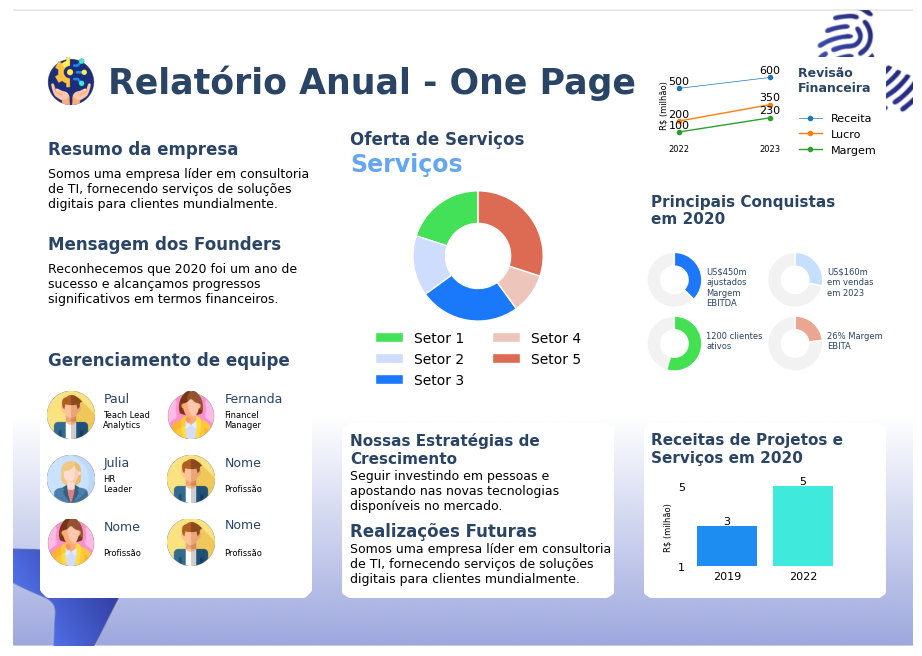

In [ ]:
fig = plt.figure(figsize=(11.69, 8.27)) # fig tamanho A4
gs0 = fig.add_gridspec(40, 30, wspace=0, hspace=0)

# fundo --------------
ax = fig.add_subplot(gs0[:, :])

[spine.set_color('none') for spine in ax.spines.values()]
[tick.label1.set_visible(False) for tick in ax.xaxis.get_major_ticks()]
[tick.label1.set_visible(False) for tick in ax.yaxis.get_major_ticks()]
ax.tick_params(axis='both', color='none')

#width_rect, height_rect = 0.78, 0.78
#x_rect = (1 - width_rect) / 2
#y_rect = (1 - height_rect) / 2
#roundness = 0.4
#rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
#                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#E9EFFF')
#ax.add_patch(rect)

caminho_da_imagem_fundo  = '/content/drive/MyDrive/Estudos/report/img/fundo_solvis.png'
imagem = mpimg.imread(caminho_da_imagem_fundo)
img = ax.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
ax.axis('off')

# layout --------------
layout_titulo = fig.add_subplot(gs0[3:6, :17])
#layout_titulo_img_fundo = fig.add_subplot(gs0[3:6, 1:3])
layout_titulo_img = fig.add_subplot(gs0[3:6, 1:3])

layout_resumo = fig.add_subplot(gs0[7:19, 1:10])
layout_resumo_fist_titulo = fig.add_subplot(gs0[7:9, 1:10])
layout_resumo_fist_texto = fig.add_subplot(gs0[9:13, 1:10])
layout_resumo_secnd_titulo = fig.add_subplot(gs0[13:15, 1:10])
layout_resumo_secnd_texto = fig.add_subplot(gs0[15:19, 1:10])

layout_people = fig.add_subplot(gs0[20:37, 1:10])
layout_people_titulo = fig.add_subplot(gs0[21:23, 1:10])

layout_people_one = fig.add_subplot(gs0[24:27, 1:3])
layout_people_one_name = fig.add_subplot(gs0[24:25, 3:6])
layout_people_one_text = fig.add_subplot(gs0[25:27, 3:6])

layout_people_two = fig.add_subplot(gs0[28:31, 1:3])
layout_people_two_name = fig.add_subplot(gs0[28:29, 3:6])
layout_people_two_text = fig.add_subplot(gs0[29:31, 3:6])

layout_people_three = fig.add_subplot(gs0[32:35, 1:3])
layout_people_three_name = fig.add_subplot(gs0[32:33, 3:6])
layout_people_three_text = fig.add_subplot(gs0[33:35, 3:6])

layout_people_four = fig.add_subplot(gs0[24:27, 5:7])
layout_people_four_name = fig.add_subplot(gs0[24:25, 7:10])
layout_people_four_text = fig.add_subplot(gs0[25:27, 7:10])

layout_people_five = fig.add_subplot(gs0[28:31, 5:7])
layout_people_five_name = fig.add_subplot(gs0[28:29, 7:10])
layout_people_five_text = fig.add_subplot(gs0[29:31, 7:10])

layout_people_six = fig.add_subplot(gs0[32:35, 5:7])
layout_people_six_name = fig.add_subplot(gs0[31:33, 7:10])
layout_people_six_text = fig.add_subplot(gs0[33:35, 7:10])

layout_graf_one = fig.add_subplot(gs0[7:25, 11:20])
layout_graf_one_titulo = fig.add_subplot(gs0[7:9, 11:20])
layout_graf_one_sub_titulo = fig.add_subplot(gs0[9:11, 11:20])
layout_graf_one_graf = fig.add_subplot(gs0[11:20, 12:19])

layout_comentarios = fig.add_subplot(gs0[26:37, 11:20])
layout_comentarios_fist_titulo = fig.add_subplot(gs0[26:28, 11:20])
layout_comentarios_fist_texto = fig.add_subplot(gs0[28:32, 11:20])
layout_comentarios_secnd_titulo = fig.add_subplot(gs0[31:33, 11:20])
layout_comentarios_secnd_texto = fig.add_subplot(gs0[33:37, 11:20])

layout_financas = fig.add_subplot(gs0[3:10, 21:29])
layout_financas_graf = fig.add_subplot(gs0[5:7, 22:29])
layout_financas_titulo = fig.add_subplot(gs0[3:5, 26:29])

layout_key = fig.add_subplot(gs0[11:25, 21:29])
layout_key_titulo = fig.add_subplot(gs0[11:13, 21:29])

layout_key_graf_one = fig.add_subplot(gs0[15:19, 21:23])
layout_key_graf_one_text = fig.add_subplot(gs0[15:19, 23:25])

layout_key_graf_two = fig.add_subplot(gs0[19:23, 21:23])
layout_key_graf_two_text = fig.add_subplot(gs0[19:23, 23:25])

layout_key_graf_three = fig.add_subplot(gs0[15:19, 25:27])
layout_key_graf_three_text = fig.add_subplot(gs0[15:19, 27:29])

layout_key_graf_four = fig.add_subplot(gs0[19:23, 25:27])
layout_key_graf_four_text = fig.add_subplot(gs0[19:23, 27:29])

layout_revenues = fig.add_subplot(gs0[26:37, 21:29])
layout_revenues_titulo = fig.add_subplot(gs0[26:28, 21:29])
layout_revenues_graf = fig.add_subplot(gs0[28:35, 21:29])


# tratamento p/ layouts de fundo
layout_fundo = [
    layout_resumo,
    layout_people,
    layout_graf_one,
    layout_comentarios,
    layout_financas,
    layout_key,
    layout_revenues,
]

[spine.set_color('none') for layout in layout_fundo for spine in layout.spines.values()] # sem contorno
[layout.set_facecolor('none') for layout in layout_fundo] # fundo sem cor
#[spine.set_linewidth(3.0) for layout in layout_fundo for spine in layout.spines.values()] # grossura contorno
[tick.label1.set_visible(False) for layout in layout_fundo for tick in layout.xaxis.get_major_ticks()] # s/ rótulos
[tick.label1.set_visible(False) for layout in layout_fundo for tick in layout.yaxis.get_major_ticks()]
[ax.tick_params(axis='both', color='none') for layout in layout_fundo for ax in [layout]] # s/ tracejado

# tratamento p/ layouts internos
layout_int = [
    #layout_titulo_img_fundo,
    layout_titulo_img,

    layout_titulo,
    layout_resumo_fist_titulo,
    layout_resumo_fist_texto,
    layout_resumo_secnd_titulo,
    layout_resumo_secnd_texto,

    layout_people_titulo,
    layout_people_titulo,

    layout_people_one,
    layout_people_one_name,
    layout_people_one_text,

    layout_people_two,
    layout_people_two_name,
    layout_people_two_text,

    layout_people_three,
    layout_people_three_name,
    layout_people_three_text,

    layout_people_four_name,
    layout_people_four_text,

    layout_people_five,
    layout_people_five_name,
    layout_people_five_text,

    layout_people_six,
    layout_people_six_name,
    layout_people_six_text,

    layout_graf_one_titulo,
    layout_graf_one_sub_titulo,
    layout_graf_one_graf,

    layout_comentarios_fist_titulo,
    layout_comentarios_fist_texto,
    layout_comentarios_secnd_titulo,
    layout_comentarios_secnd_texto,

    layout_financas_graf,
    layout_financas_titulo,

    layout_key_titulo,

    layout_key_graf_one,
    layout_key_graf_one_text,

    layout_key_graf_two,
    layout_key_graf_two_text,

    layout_key_graf_three,
    layout_key_graf_three_text,

    layout_key_graf_four,
    layout_key_graf_four_text,

    layout_revenues_titulo,
    layout_revenues_graf,

]

[layout.set_facecolor('none') for layout in layout_int] # s/ preenchimento
[layout.spines[:].set_visible(False) for layout in layout_int] # s/ contorno
[tick.label1.set_visible(False) for layout in layout_int for tick in layout.xaxis.get_major_ticks()] # s/ rótulos
[tick.label1.set_visible(False) for layout in layout_int for tick in layout.yaxis.get_major_ticks()]
[ax.tick_params(axis='both', color='none') for layout in layout_int for ax in [layout]] # s/ tracejado

# título --------------
caminho_da_imagem_logo = '/content/drive/MyDrive/Estudos/report/img/future-technology.png'
imagem = mpimg.imread(caminho_da_imagem_logo)
img = layout_titulo_img.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_titulo_img.axis('off')

#width_rect, height_rect = 0.78, 0.78
#x_rect = (1 - width_rect) / 2
#y_rect = (1 - height_rect) / 2
#roundness = 0
#rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
#                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#EBEBEB')
#layout_titulo.add_patch(rect)

layout_titulo.text(0.19, 0.1, f'Relatório Anual - One Page', ha='left', va='bottom', fontsize=25, color='#2a4466', fontweight='bold')

# resumo --------------
width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_resumo.add_patch(rect)

layout_resumo_fist_titulo.text(0.03, 0.4, f'Resumo da empresa', ha='left', va='top', fontsize=12, color='#2a4466', fontweight='bold')
layout_resumo_fist_texto.text(0.03, 0.1, f'Somos uma empresa líder em consultoria \nde TI, fornecendo serviços de soluções \ndigitais para clientes mundialmente.', ha='left', va='bottom', fontsize=9, color='black')

layout_resumo_secnd_titulo.text(0.03, 0.4, f'Mensagem dos Founders', ha='left', va='top', fontsize=12, color='#2a4466', fontweight='bold')
layout_resumo_secnd_texto.text(0.03, 0.1, f'Reconhecemos que 2020 foi um ano de \nsucesso e alcançamos progressos \nsignificativos em termos financeiros.', ha='left', va='bottom', fontsize=9, color='black')

# people --------------
width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_people.add_patch(rect)

layout_people_titulo.text(0.03, 0.2, f'Gerenciamento de equipe', ha='left', va='bottom', fontsize=12, color='#2a4466', fontweight='bold')
layout_people_one_name.text(0.035, 0.1, f'Paul', ha='left', va='bottom', fontsize=9, color='#2a4466')
layout_people_one_text.text(0.03, 0.3, f'Teach Lead\nAnalytics', ha='left', va='bottom', fontsize=6, color='black')

caminho_da_imagem_people_one = '/content/drive/MyDrive/Estudos/report/img/man.png'
imagem = mpimg.imread(caminho_da_imagem_people_one)
img = layout_people_one.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_people_one.axis('off')

layout_people_two_name.text(0.035, 0.1, f'Julia', ha='left', va='bottom', fontsize=9, color='#2a4466')
layout_people_two_text.text(0.03, 0.3, f'HR\nLeader', ha='left', va='bottom', fontsize=6, color='black')

caminho_da_imagem_people_two = '/content/drive/MyDrive/Estudos/report/img/woman.png'
imagem = mpimg.imread(caminho_da_imagem_people_two)
img = layout_people_two.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_people_two.axis('off')

layout_people_three_name.text(0.035, 0.1, f'Nome', ha='left', va='bottom', fontsize=9, color='#2a4466')
layout_people_three_text.text(0.03, 0.3, f'Profissão', ha='left', va='bottom', fontsize=6, color='black')

caminho_da_imagem_people_two = '/content/drive/MyDrive/Estudos/report/img/woman_four.png'
imagem = mpimg.imread(caminho_da_imagem_people_two)
img = layout_people_three.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_people_three.axis('off')

layout_people_four_name.text(0.035, 0.1, f'Fernanda', ha='left', va='bottom', fontsize=9, color='#2a4466')
layout_people_four_text.text(0.03, 0.3, f'Financel\nManager', ha='left', va='bottom', fontsize=6, color='black')

caminho_da_imagem_people_four = '/content/drive/MyDrive/Estudos/report/img/woman_four.png'
imagem = mpimg.imread(caminho_da_imagem_people_four)
img = layout_people_four.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_people_four.axis('off')

layout_people_five_name.text(0.035, 0.1, f'Nome', ha='left', va='bottom', fontsize=9, color='#2a4466')
layout_people_five_text.text(0.03, 0.3, f'Profissão', ha='left', va='bottom', fontsize=6, color='black')

caminho_da_imagem_people_one = '/content/drive/MyDrive/Estudos/report/img/man.png'
imagem = mpimg.imread(caminho_da_imagem_people_one)
img = layout_people_five.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_people_five.axis('off')

layout_people_six_name.text(0.035, 0.1, f'Nome', ha='left', va='bottom', fontsize=9, color='#2a4466')
layout_people_six_text.text(0.03, 0.3, f'Profissão', ha='left', va='bottom', fontsize=6, color='black')

caminho_da_imagem_people_one = '/content/drive/MyDrive/Estudos/report/img/man.png'
imagem = mpimg.imread(caminho_da_imagem_people_one)
img = layout_people_six.imshow(imagem)
nova_largura = imagem.shape[1]
nova_altura = imagem.shape[0]
img.set_extent([0, nova_largura, 0, nova_altura])
layout_people_six.axis('off')

# serviços --------------
layout_graf_one_titulo.text(0.03, 0.7, f'Oferta de Serviços', ha='left', va='top', fontsize=12, color='#2a4466', fontweight='bold')
layout_graf_one_sub_titulo.text(0.03, 1, f'Serviços', ha='left', va='top', fontsize=17, color='#66a6f0', fontweight='bold')

valores = [20, 15, 25, 10, 30]

cores = ['#42e157', '#ceddfe', '#1a79fb', '#eec5ba', '#dd6b53']
rótulos = ['Setor 1', 'Setor 2', 'Setor 3', 'Setor 4', 'Setor 5']

layout_graf_one_graf.pie(valores, colors=cores, startangle=90, wedgeprops=dict(width=0.5, edgecolor='white'))
centro_círculo = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_círculo)
layout_graf_one_graf.axis('equal')
layout_graf_one_graf.legend(rótulos, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2, frameon = False)

width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_graf_one.add_patch(rect)

# comentarios --------------
layout_comentarios_fist_titulo.text(0.03, 0.7, f'Nossas Estratégias de \nCrescimento', ha='left', va='top', fontsize=11, color='#2a4466', fontweight='bold')
layout_comentarios_fist_texto.text(0.03, 0.1, f'Seguir investindo em pessoas e \napostando nas novas tecnologias \ndisponíveis no mercado.', ha='left', va='bottom', fontsize=9, color='black')

layout_comentarios_secnd_titulo.text(0.03, 0.4, f'Realizações Futuras', ha='left', va='top', fontsize=12, color='#2a4466', fontweight='bold')
layout_comentarios_secnd_texto.text(0.03, 0.2, f'Somos uma empresa líder em consultoria \nde TI, fornecendo serviços de soluções \ndigitais para clientes mundialmente.', ha='left', va='bottom', fontsize=9, color='black')

width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_comentarios.add_patch(rect)

# finanças --------------
width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_financas.add_patch(rect)

anos = [2022, 2023]
receita = [500, 600]
lucro_liquido = [200, 350]
margem_liquida = [100, 230]
rotulos = ['Receita', 'Lucro', 'Margem']

bx_width, bx_height = 1, 0.6
bx = inset_axes(layout_financas_graf, width=bx_width, height=bx_height, borderpad=0, loc='center left')
bx.plot(anos, receita, marker='o', label='Receita', lw=0.5, markersize=3)
bx.plot(anos, lucro_liquido, marker='o', label='Lucro Líquido', lw=1, markersize=3)
bx.plot(anos, margem_liquida, marker='o', label='Margem Líquida', lw=1, markersize=3)

for i, txt in enumerate(receita):
    bx.text(anos[i], receita[i] + 20, f'{receita[i]}', ha='center', va='bottom', fontsize=8)

for i, txt in enumerate(lucro_liquido):
    bx.text(anos[i], lucro_liquido[i] + 20, f'{lucro_liquido[i]}', ha='center', va='bottom', fontsize=8)

for i, txt in enumerate(margem_liquida):
    bx.text(anos[i], margem_liquida[i] + 20, f'{margem_liquida[i]}', ha='center', va='bottom', fontsize=8)

#percentuais_receita = [round((atual - anterior) / anterior * 100) for atual, anterior in zip(receita[1:], receita[:-1])]
#percentuais_lucro = [round((atual - anterior) / anterior * 100) for atual, anterior in zip(lucro_liquido[1:], lucro_liquido[:-1])]
#percentuais_margem = [round((atual - anterior) / anterior * 100) for atual, anterior in zip(margem_liquida[1:], margem_liquida[:-1])]

#for i, txt in enumerate(receita[1:]):
#    bx.text(anos[i + 1], receita[i + 1] - 20, f' +{percentuais_receita[i]}%', ha='center', va='top', color='gray', fontsize=8)

#for i, txt in enumerate(lucro_liquido[1:]):
#    bx.text(anos[i + 1], lucro_liquido[i + 1] - 20, f' +{percentuais_lucro[i]}%', ha='center', va='top', color='gray', fontsize=8)

#for i, txt in enumerate(margem_liquida[1:]):
#    bx.text(anos[i + 1], margem_liquida[i + 1] - 20, f' +{percentuais_margem[i]}%', ha='center', va='top', color='gray', fontsize=8)

#x.xlabel('Ano')

bx.legend(rotulos, loc='lower left', bbox_to_anchor=(1.15, -0.5), ncol=1, frameon = False, fontsize=8)
plt.ylabel('R$ (milhão)', fontsize=6)
plt.xticks(anos, fontsize=6)
plt.yticks([])
plt.tick_params(axis='both', color='none')
plt.gca().spines[:].set_visible(False)

layout_financas_titulo.text(0.03, 0.7, f'Revisão \nFinanceira', ha='left', va='top', fontsize=9, color='#2a4466', fontweight='bold')
# key --------------

width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_key.add_patch(rect)

layout_key_titulo.text(0.03, 0.7, f'Principais Conquistas\nem 2020', ha='left', va='top', fontsize=11, color='#2a4466', fontweight='bold')

valores = [100, 60]
cores = ['#f2f2f2', '#1e77f8']
layout_key_graf_one.pie(valores, colors=cores, startangle=90, wedgeprops=dict(width=0.5, edgecolor='white'))
centro_círculo = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_círculo)
layout_key_graf_one.axis('equal')

layout_key_graf_one_text.text(0.03, 0.7, f'US$450m\najustados\nMargem\nEBITDA', ha='left', va='top', fontsize=6, color='#2a4466')
#---
valores = [100, 40]
cores = ['#f2f2f2', '#c7dfff']
layout_key_graf_three.pie(valores, colors=cores, startangle=90, wedgeprops=dict(width=0.5, edgecolor='white'))
centro_círculo = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_círculo)
layout_key_graf_three.axis('equal')

layout_key_graf_three_text.text(0.03, 0.7, f'US$160m\nem vendas\nem 2023', ha='left', va='top', fontsize=6, color='#2a4466')
#---
valores = [100, 120]
cores = ['#f2f2f2', '#43e052']
layout_key_graf_two.pie(valores, colors=cores, startangle=90, wedgeprops=dict(width=0.5, edgecolor='white'))
centro_círculo = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_círculo)
layout_key_graf_two.axis('equal')

layout_key_graf_two_text.text(0.03, 0.7, f'1200 clientes\nativos', ha='left', va='top', fontsize=6, color='#2a4466')
#---
valores = [100, 30]
cores = ['#f2f2f2', '#eba692']
layout_key_graf_four.pie(valores, colors=cores, startangle=90, wedgeprops=dict(width=0.5, edgecolor='white'))
centro_círculo = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_círculo)
layout_key_graf_four.axis('equal')

layout_key_graf_four_text.text(0.03, 0.7, f'26% Margem\nEBITA', ha='left', va='top', fontsize=6, color='#2a4466')
# revenues --------------

layout_revenues_titulo.text(0.03, 0.7, f'Receitas de Projetos e\nServiços em 2020', ha='left', va='top', fontsize=11, color='#2a4466', fontweight='bold')

width_rect, height_rect = 0.78, 0.78
x_rect = (1 - width_rect) / 2
y_rect = (1 - height_rect) / 2
roundness = 0.13
rect = FancyBboxPatch((x_rect, y_rect), width_rect, height_rect,
                        boxstyle=f"round,pad={roundness}", linewidth=1, edgecolor='none', facecolor='#ffffff')
layout_revenues.add_patch(rect)

#cores = ['#1a78fa', '#43e059']
cores = ['#1d8df2', '#3feadd']
ano = ['2019', '2022']
valores = [3, 5]

bx_width, bx_height = 1.5, 0.8
bx = inset_axes(layout_revenues_graf, width=bx_width, height=bx_height, borderpad=0, loc='lower center')
barras = bx.bar(ano, valores, color=cores, edgecolor='none')
for barra in barras:
    altura = barra.get_height()
    bx.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura}', ha='center', va='bottom', fontsize=8)

bx.tick_params(axis='both', which='both', length=0, labelsize=8)
bx.set_yticks([1, 5])
plt.ylabel('R$ (milhão)', fontsize=6)
plt.ylim(1, 5)
bx.spines[:].set_visible(False)




🔗`links de referência:`

`construção de layout:`

- [GridSpec](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html)
- [Localização de uma subparcela em um GridSpec](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.SubplotSpec.html#matplotlib.gridspec.SubplotSpec)


`gráficos e imagens:`
- [Caixa com dimensões especificadas](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyBboxPatch.html)
- [Eixos inseridos com uma determinada largura e altura](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.axes_grid1.inset_locator.inset_axes.html)
- [Imagem anexada a um eixo](https://matplotlib.org/stable/api/image_api.html)

`config pdf:`
- [Gerar e salvar arquivo PDF](https://matplotlib.org/stable/api/backend_pdf_api.html#matplotlib.backends.backend_pdf.PdfPages.savefig)

`outras referências:`

- [Classe Matplotlib.gridspec.GridSpec em Python - Acervo Lima](https://acervolima.com/classe-matplotlib-gridspec-gridspec-em-python/ )
- [Distribuição de gráficos em um layout](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py)

`mandrill:`

- [Integração com API do Mandrill para envio de emails](https://www.google.com/search?q=conectar+a+api+do+mandrill&rlz=1C1GCCU_pt-BR&oq=conectar+a+api+do+mandrill&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIKCAEQABiABBiiBDIKCAIQABiABBiiBNIBCDY5NTlqMGo5qAIAsAIA&sourceid=chrome&ie=UTF-8#fpstate=ive&vld=cid:c8e58ef4,vid:NtvHhn4g8lk,st:0)

- [Integração do Mandrill](https://www.kommo.com/br/integracoes/mandrill/#:~:text=Para%20isso%2C%20voc%C3%AA%20precisar%C3%A1%20acessar,ou%20continuar%20usando%20a%20antiga.)

`layout`

- https://www.canva.com/design/DAGBrFTvvVo/SXoBuYKzf2fIFz3T-Fp0Lg/edit

- https://www.figma.com/file/PLO7n5d0lUXSNaxXU0U64O/Dashboards?type=design&node-id=145-101&mode=design&t=OqEJQqKDjGN6k1ZB-0

## ---

